In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# 读取数据
data = pd.read_csv('./tmp/data_cleaned.csv')
features = ['Ration_L1Y_Flight_Count', 'Ration_P1Y_Flight_Count', 'Ration_P1Y_BPS', 'Ration_L1Y_BPS', 'Point_NotFlight']
data[features].head()

,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,0.509524,0.490476,0.487221,0.512777,50
1,0.514286,0.485714,0.489289,0.510708,33
2,0.518519,0.481481,0.481467,0.518530,26
3,0.434783,0.565217,0.551722,0.448275,12
4,0.532895,0.467105,0.469054,0.530943,39


In [3]:
X = data[features].values

In [4]:
# 构建KMeans模型
k = 5
kmeans_model = KMeans(n_clusters=5, n_init=5, random_state=123)
kmeans_model.fit(X)

KMeans(n_clusters=5, n_init=5, random_state=123)

In [5]:
# 样本的类别标签
kmeans_labels = kmeans_model.labels_
kmeans_labels

array([3, 2, 2, ..., 1, 1, 1], dtype=int32)

In [6]:
# 聚类中心
cluster_centers = kmeans_model.cluster_centers_
cluster_centers

array([[ 0.5377929 ,  0.4622071 ,  0.47017027,  0.51732473,  8.67734168],
       [ 0.48310272,  0.51689728,  0.5258968 ,  0.46597918,  0.39687045],
       [ 0.50398814,  0.49601186,  0.50602372,  0.48635611, 31.17319705],
       [ 0.51406546,  0.48593454,  0.50487367,  0.49505639, 62.41666667],
       [ 0.54069065,  0.45930935,  0.47005784,  0.5125159 , 19.81461378]])

In [7]:
# 每个类别的客户数
r1 = pd.Series(kmeans_labels).value_counts()
r1

1    53554
0     4153
4     2395
2     1761
3      180
Name: count, dtype: int64

In [8]:
cluster_center_df = pd.DataFrame(cluster_centers, columns=features)
cluster_center_df

,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,0.537793,0.462207,0.470170,0.517325,8.677342
1,0.483103,0.516897,0.525897,0.465979,0.396870
2,0.503988,0.496012,0.506024,0.486356,31.173197
3,0.514065,0.485935,0.504874,0.495056,62.416667
4,0.540691,0.459309,0.470058,0.512516,19.814614


In [9]:
labels = features + [features[0]]  # 让标签和数据点的数量一致
lstype = ['-', '--', '-.', ':', (0, (3, 5, 1, 5, 1, 5))]
# 由于雷达图要保证数据闭合，因此再添加第一个特征列，并转换为ndarray
cluster_center_df = pd.concat([cluster_center_df, cluster_center_df[['Ration_L1Y_Flight_Count']]], axis=1)
centers = np.array(cluster_center_df)

In [10]:
# 分割圆周长，并让其闭合
n = len(features)
angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # 闭合

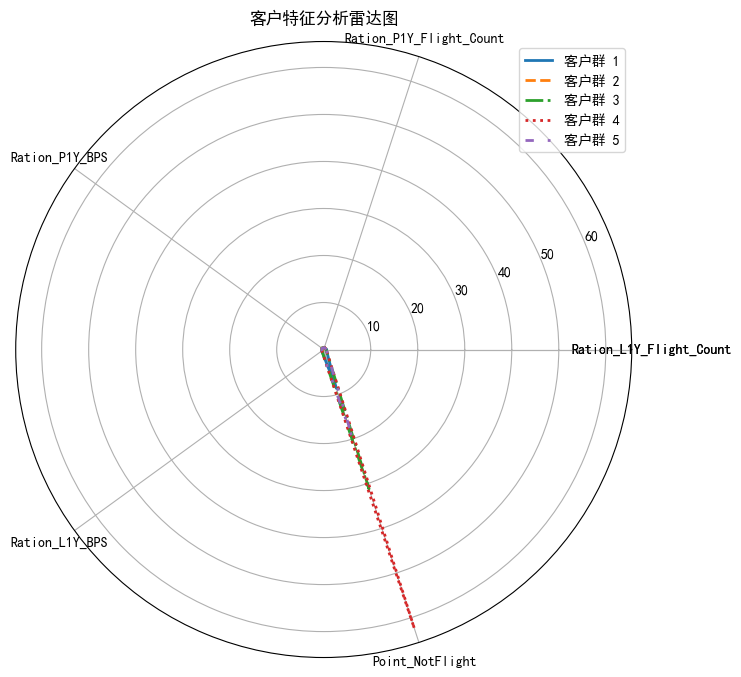

In [12]:
# 绘图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)

for i in range(k):
    ax.plot(angles, centers[i], linestyle=lstype[i], linewidth=2, label=f'客户群 {i+1}')

ax.set_thetagrids(angles * 180 / np.pi, labels)
plt.title('客户特征分析雷达图')
plt.legend(loc='best')

plt.savefig('./tmp/cluster_center_plot.png')
plt.show()